In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:


# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)
listings = listing_data
# Inspect the results
listing_data.info()
nyse = listing_data[listing_data['Exchange'] == 'nyse']

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_74916\313065155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)


<class 'pandas.core.frame.DataFrame'>
Index: 3147 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
 7   Exchange               3147 non-null   object 
dtypes: float64(3), object(5)
memory usage: 221.3+ KB


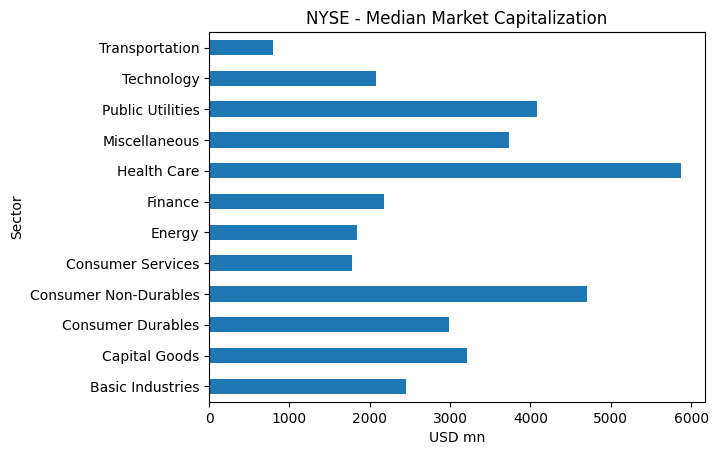

In [6]:
# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector['market_cap_m'].median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB
     Stock Symbol                                       Company Name  \
0            XXII                            22nd Century Group, Inc   
1             FAX              Aberdeen Asia-Pacific Income Fund Inc   
2             IAF                 Aberdeen Australia Equity Fund Inc   
3              CH                    

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_74916\3546741004.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['IPO Year'] = listings['IPO Year'].dropna().astype(int)


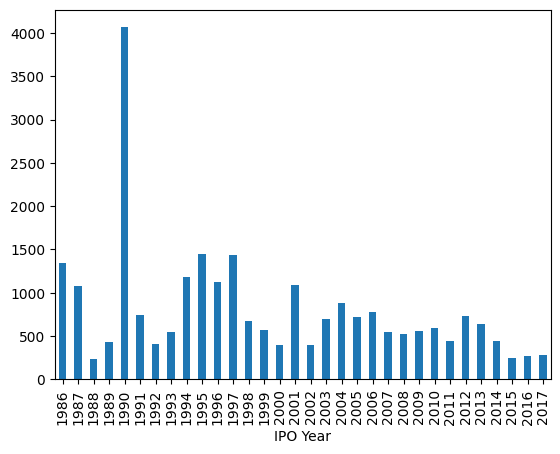

In [7]:
# Fixed script:

# Inspect listings
listings.info()

# Show listings head
print(listings.head())

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listings = listings[listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
listings['IPO Year'] = listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listings.groupby('IPO Year')['market_cap_m'].median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

In [13]:
nasdaq = listing_data[listing_data['Exchange'] == 'nasdaq']

In [14]:
# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
(summary)


<class 'pandas.core.frame.DataFrame'>
Index: 3167 entries, 0 to 3166
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
 7   Exchange               3167 non-null   object 
 8   market_cap_m           3167 non-null   float64
dtypes: float64(4), object(5)
memory usage: 247.4+ KB


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_74916\264244542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_74916\264244542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq.drop('Market Capitalization', axis=1, inplace=True)


Last Sale                                          \
                          count       mean         std     min      25%   
Sector                                                                    
Basic Industries           78.0  21.597679   29.009745  0.0336   2.6325   
Capital Goods             172.0  26.188681   36.596723  0.1500   4.3800   
Consumer Durables          88.0  24.363391   44.399150  0.0498   3.7500   
Consumer Non-Durables     103.0  25.749565   34.669635  0.1996   3.8800   
Consumer Services         348.0  34.917318   67.416144  0.0488   6.8250   
Energy                     65.0  15.496834   22.952420  0.1330   1.9600   
Finance                   627.0  29.644242   61.446557  0.0752  10.7350   
Health Care               645.0  19.462531   46.932855  0.0081   2.1200   
Miscellaneous              89.0  46.094369  186.951618  0.8384   3.5700   
Public Utilities           66.0  18.643705   19.307475  0.2532   5.3325   
Technology                433.0  31.100317   63.761748  0.1800   5.1000   
Transportation             52.0  28.096758   30.627056  0.2300   3.6400   

                                                IPO Year               ...  \
                          50%      75%      max    count         mean  ...   
Sector                                                                 ...   
Basic Industries        8.580  22.4800   114.80     30.0  2000.766667  ...   
Capital Goods          16.020  33.5400   304.00     77.0  2001.324675  ...   
Consumer Durables       9.685  30.6525   354.00     36.0  2003.222222  ...   
Consumer Non-Durables  11.290  34.8600   202.18     41.0  2000.609756  ...   
Consumer Services      20.660  37.5250   884.67    153.0  2004.104575  ...   
Energy                  8.120  17.9800   114.10     29.0  2008.034483  ...   
Finance                21.200  32.7000  1367.00    218.0  2010.321101  ...   
Health Care             6.260  19.3800   764.79    391.0  2009.240409  ...   
Miscellaneous          11.210  34.3300  1738.77     42.0  2004.333333  ...   
Public Utilities       13.150  25.3150   104.46     25.0  2006.040000  ...   
Technology             15.000  37.9500   840.18    274.0  2002.653285  ...   
Transportation         19.000  43.5950   152.05     21.0  1997.809524  ...   

                                       market_cap_m                \
                           75%     max        count          mean   
Sector                                                              
Basic Industries       2011.75  2016.0         78.0    724.899934   
Capital Goods          2012.00  2016.0        172.0   1511.237373   
Consumer Durables      2013.00  2015.0         88.0    839.802607   
Consumer Non-Durables  2011.00  2016.0        103.0   3104.051206   
Consumer Services      2013.00  2017.0        348.0   5582.344175   
Energy                 2016.00  2017.0         66.0    826.607608   
Finance                2015.00  2017.0        627.0   1044.090205   
Health Care            2015.00  2017.0        645.0   1758.709197   
Miscellaneous          2010.75  2016.0         89.0   3445.655935   
Public Utilities       2014.00  2016.0         66.0   2357.865315   
Technology             2012.00  2017.0        433.0  10883.434214   
Transportation         2006.00  2013.0         52.0   2869.660007   

                                                                              \
                                std  min        25%         50%          75%   
Sector                                                                         
Basic Industries        1445.544949  0.0  42.870409  150.385214   721.203429   
Capital Goods           4829.846757  0.0  68.473978  293.801019  1031.733122   
Consumer Durables       1907.604606  0.0  41.234061  177.593858   669.007612   
Consumer Non-Durables  12998.094858  0.0  47.795651  229.930660  1149.085989   
Consumer Services      26492.247636  0.0  79.944770  524.151914  2463.643810   
Energy                  1568.869627  0.0  53.6041

In [15]:

# Unstack
summary = summary.unstack()

# Print the summary again
(summary)

                     Sector               
Last Sale     count  Basic Industries             78.000000
                     Capital Goods               172.000000
                     Consumer Durables            88.000000
                     Consumer Non-Durables       103.000000
                     Consumer Services           348.000000
                                                  ...      
market_cap_m  max    Health Care              118927.210535
                     Miscellaneous             85496.045967
                     Public Utilities          52930.713577
                     Technology               740024.467000
                     Transportation            43005.669415
Length: 288, dtype: float64

Sector            Exchange
Basic Industries  amex         137.318135
                  nasdaq       169.181116
                  nyse        1672.751912
Capital Goods     amex         107.390617
                  nasdaq       477.069539
Name: market_cap_m, dtype: float64


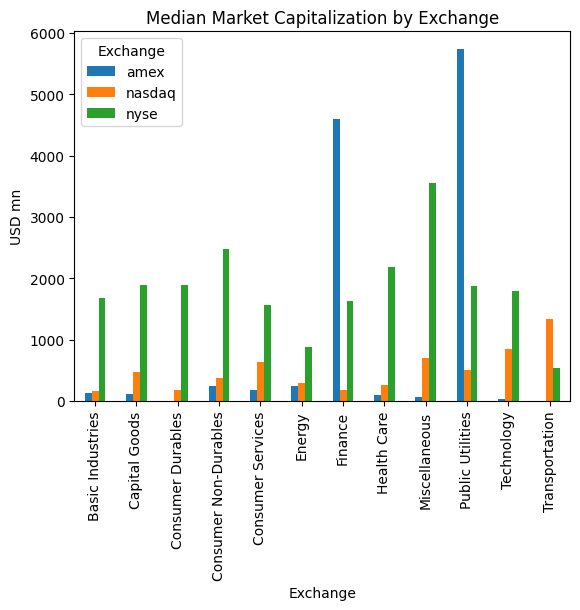

In [16]:
# Group listings by Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange['market_cap_m'].median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('Exchange')

# Set the y label
plt.ylabel('USD mn')

# Show the plot
plt.show()

In [18]:
# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg(['mean', 'median', 'std']).rename(columns={'mean': 'Average', 'median': 'Median', 'std':'Standard Deviation'})

# Print the result to console
(summary)

Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        374.323921   137.318135          709.618981
                      nasdaq      824.788760   169.181116         1937.492260
                      nyse       4192.727667  1672.751912         9126.659431
Capital Goods         amex        148.943096   107.390617           95.611487
                      nasdaq     2031.734096   477.069539         6593.280268
                      nyse       5746.444596  1898.473017         8272.670181
Consumer Durables     nasdaq     1045.413873   178.278939         2493.971323
                      nyse       2926.061359  1888.834676         3083.301891
Consumer Non-Durables amex        237.644444   237.644444                 NaN
                      nasdaq     1258.570987   367.018066         1844.221028
                      nyse       6473.559842  2479.639848        13552.556986
Consumer Services     amex        384.352154   179.527440          611.499528
                      nasdaq     6305.025625   629.151143        35542.399355
                      nyse       3581.987193  1571.218469         6233.587643
Energy                amex        249.742591   249.742591          324.786813
                      nasdaq     1156.106446   300.125044         2032.844323
                      nyse       2493.253985   880.840936         3852.830273
Finance               amex       4603.773150  4603.773150                 NaN
                      nasdaq      978.431490   172.592727         3385.688248
                      nyse       7782.199107  1624.029953        16719.747952
Health Care           amex        163.496033   103.728355          177.393679
                      nasdaq     1771.188787   255.867045         7738.743762
                      nyse       8614.620574  2181.557818        20000.536445
Miscellaneous         amex         59.131037    59.131037                 NaN
                      nasdaq     4885.256319   708.049161        14335.506052
                      nyse      23307.024754  3555.299025        59161.455844
Public Utilities      amex       5977.109479  5739.209000         4955.148191
                      nasdaq      682.652627   501.616063          652.457963
                      nyse       6321.737537  1878.593815        10750.340755
Technology            amex         74.052744    37.639075           78.520838
                      nasdaq    10186.196194   849.256672        54235.801335
                      nyse       7548.397108  1787.683850        24388.967377
Transportation        nasdaq     2464.370869  1329.873667         3140.455329
                      nyse       4461.380373   533.183120        14892.608144

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_74916\728958464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['IPO Year'] = listings['IPO Year'].astype(int)


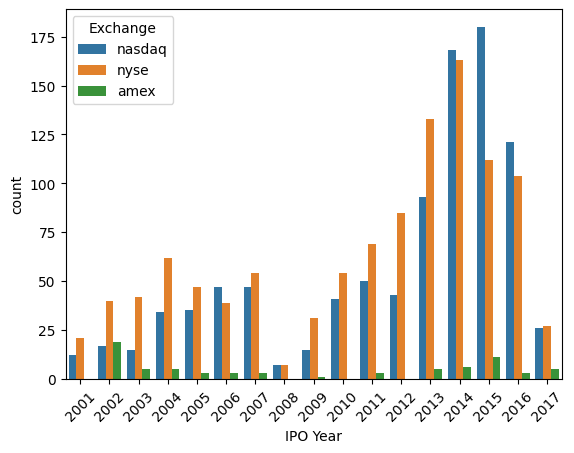

In [19]:
# Select IPOs after 2000
listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [21]:
listing_data.to_csv()

',Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange,market_cap_m\r\n0,XXII,"22nd Century Group, Inc",1.33,120628490.29,,Consumer Non-Durables,Farming/Seeds/Milling,amex,120.62849029\r\n1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0,1266332595.0,1986.0,,,amex,1266.332595\r\n2,IAF,Aberdeen Australia Equity Fund Inc,6.15,139865304.9,,,,amex,139.8653049\r\n3,CH,"Aberdeen Chile Fund, Inc.",7.2201,67563457.56899999,,,,amex,67.563457569\r\n4,ABE           ,Aberdeen Emerging Markets Smaller Company Opportunities Fund I,13.36,128842971.6,,,,amex,128.8429716\r\n5,FCO,"Aberdeen Global Income Fund, Inc.",8.62,75376107.36,1992.0,,,amex,75.37610736\r\n6,IF,"Aberdeen Indonesia Fund, Inc.",7.3299,68200145.6424,1990.0,,,amex,68.2001456424\r\n7,ISL,"Aberdeen Israel Fund, Inc.",17.65,70564682.35,1992.0,,,amex,70.56468235\r\n8,ACU,Acme United Corporation.,27.39,91138992.45,1988.0,Capital Goods,Industrial Machinery/Components,amex,91.13899245\r\n9,AIII,"ACRE Realt

In [22]:
income_trend = pd.read_csv('trend.csv', index_col=0, parse_dates=True) 

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_74916\1650259322.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  income_trend = pd.read_csv('trend.csv', index_col=0, parse_dates=True)


<class 'pandas.core.frame.DataFrame'>
Index: 2959 entries, 0 to 2958
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2959 non-null   object 
 1   Year               2959 non-null   int64  
 2   Income per Capita  2959 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 92.5+ KB


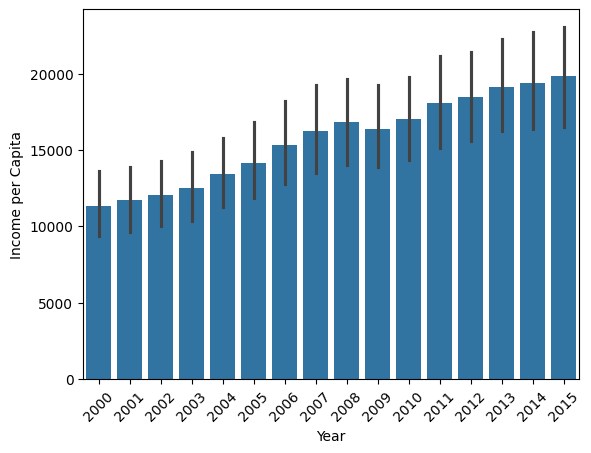

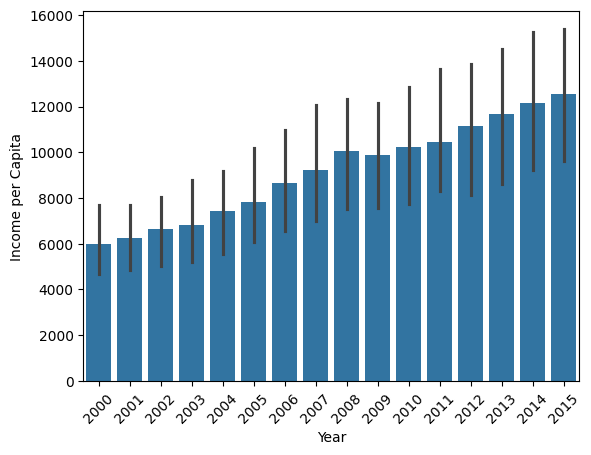

In [23]:
# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

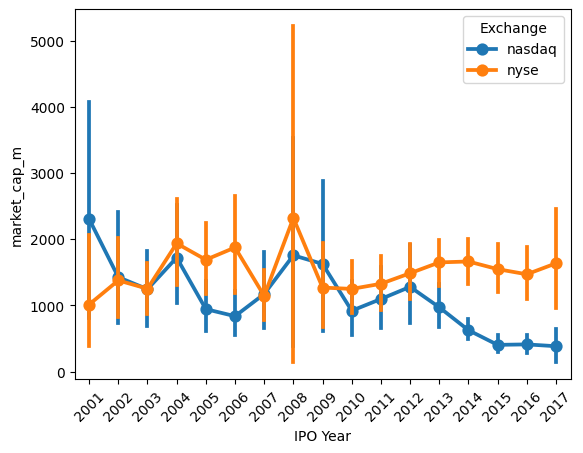

In [24]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [26]:
inflation = pd.read_csv('inflation.csv', index_col=0, parse_dates=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189 entries, 1960-01-01 to 2022-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    189 non-null    object 
 1   Inflation  162 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


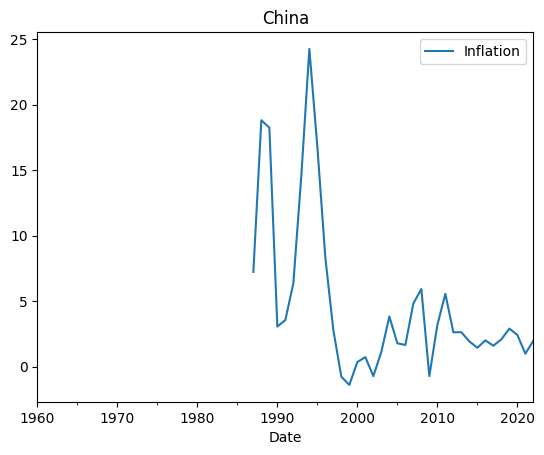

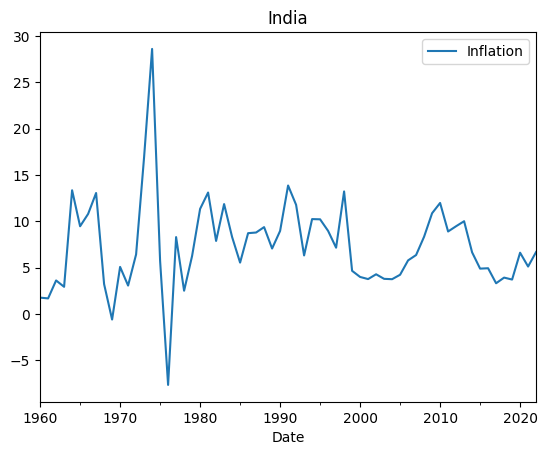

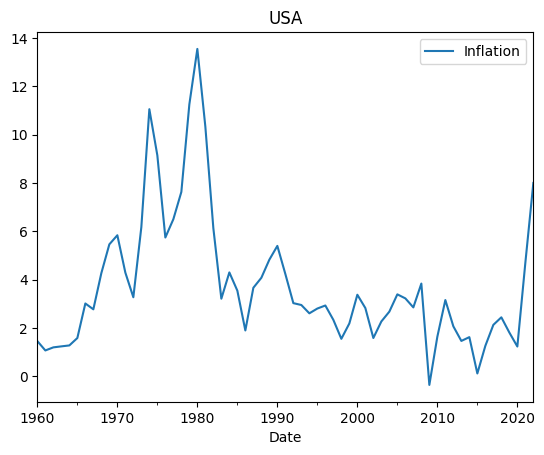

In [27]:
# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

In [29]:
inflation

,Country,Inflation
Date,,
1960-01-01,India,1.779878
1961-01-01,India,1.695213
1962-01-01,India,3.632215
1963-01-01,India,2.946161
1964-01-01,India,13.355261
...,...,...
2018-01-01,USA,2.442583
2019-01-01,USA,1.812210
2020-01-01,USA,1.233584


In [35]:
inflation = pd.read_csv('inflation.csv')

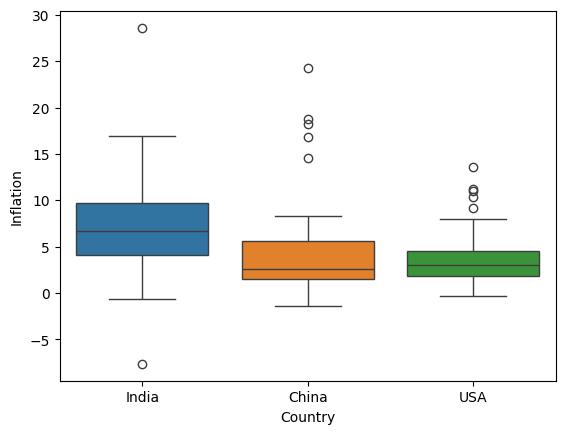

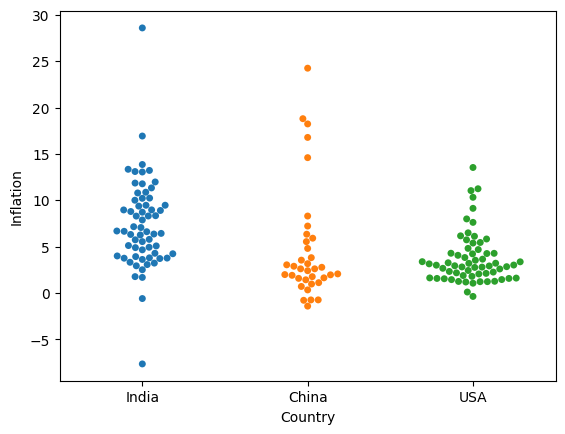

In [42]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation, hue='Country')

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation, hue='Country')

# Show the plot
plt.show()